# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Daffa Fauzan
- **Email:** muhammaddaffa09fauzan@gmail.com
- **ID Dicoding:** muhammaddaffa_fauzan

## Menentukan Pertanyaan Bisnis

1. Bagaimana rata-rata penggunaan sepeda casual dan registered berdasarkan pola perilaku penyewaan pada hari kerja, akhir pekan, dan hari libur?
2. Bagaimana hubungan antara faktor cuaca dan kondisi cuaca dengan jumlah penyewaan oleh pengguna casual dibandingkan dengan pengguna registered?
3. Pada jam berapa rata-rata penggunaan sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Membuat dataframe day.csv

In [861]:
bike_day_df = pd.read_csv("data/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Membuat dataframe hour.csv


In [862]:
bike_hour_df = pd.read_csv("data/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membuat dataframe day.csv
- Membuat dataframe hour.csv

### Assessing Data

In [863]:
bike_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [864]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Mengecek missing value pada data

In [865]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [866]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mengecek duplikasi data

In [867]:
print("Jumlah duplikasi data pada dataframe bike_day_df : ", bike_day_df.duplicated().sum())
print("Jumlah duplikasi data pada dataframe bike_hour_df : ", bike_hour_df.duplicated().sum())

Jumlah duplikasi data pada dataframe bike_day_df :  0
Jumlah duplikasi data pada dataframe bike_hour_df :  0


**Insight:**
- Kedua dataframe tidak memiliki missing value
- Kedua dataframe tidak memiliki duplikasi data
- dteday memiliki tipe data yang kurang tepat

### Cleaning Data

#### Mengubah tipe data dari dteday

In [868]:
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

In [869]:
bike_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [870]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Memberi keterangan detail pada data

In [871]:
bike_day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    "weathersit": {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                   2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                   3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                   4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog}"}
    }, inplace=True)

In [872]:
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Not Holiday,Saturday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,Not Holiday,Sunday,Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,Not Holiday,Monday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Not Holiday,Tuesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Not Holiday,Wednesday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [873]:
bike_hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    "weathersit": {1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
                   2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                   3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                   4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog}"}
    }, inplace=True)

In [874]:
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Not Holiday,Saturday,Holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore On bike_day_df

In [875]:
bike_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,Not Holiday,Saturday,Working Day,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,6.519836,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,1.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,4.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,7.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,10.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,12.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


1. Mengelompokkan penyewaan sepeda casual dan registered berdasarkan hari kerja, akhir pekan, dan hari libur

In [876]:
bike_day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean",]
})

cnt                  
              max  min         mean
workingday                         
Holiday      8714  605  4330.168831
Working Day  8362   22  4584.820000

**Insight:** 
- Hasil menunjukkan, Penggunaan sepeda pada hari kerja lebih banyak dibanding hari libur
- Pada hari kerja yang sepi mencapai hanya 22 pengguna

In [877]:
bike_day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

**Insight:**
- Penggunaan sepeda pada weekday(Monday-Friday) lebih banyak dibanding weekend(Saturday&Sunday)
- Rata-rata jumlah penggunaan sepeda terbanyak ada pada Friday dan yang terendah pada Sunday

In [878]:
bike_day_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "sum"]
})

cnt                            
              max   min         mean      sum
holiday                                      
Holiday      7403  1000  3735.000000    78435
Not Holiday  8714    22  4527.104225  3214244

**Insight:**
- Hari libur akhir pekan memiliki jumlah penggunaan sepeda yang lebih banyak dibandingkan hari libur nasional

2. Hubungan antara kondisi cuaca dengan jumlah penyewaan pengguna vs pengguna registered

In [879]:
bike_day_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

casual                  \
                                                      max min        mean   
weathersit                                                                  
Clear, Few clouds, Partly cloudy, Partly cloudy      3410  15  964.030238   
Light Snow, Light Rain + Thunderstorm + Scatter...   1264   2  185.476190   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   3155   9  687.352227   

                                                   registered       \
                                                          max  min   
weathersit                                                           
Clear, Few clouds, Partly cloudy, Partly cloudy          6946  416   
Light Snow, Light Rain + Thunderstorm + Scatter...       4324   20   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...       6844  491   

                                                                 
                                                           mean  
weathersit                                                       
Clear, Few clouds, Partly cloudy, Partly cloudy     3912.755940  
Light Snow, Light Rain + Thunderstorm + Scatter...  1617.809524  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  3348.510121

**Insight:**
- Pengguna casual maupun registered mengalami penurunan pengguna yang signifikan pada kondisi cuaca Light snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Hubungan korelasi faktor cuaca dengan pengguna casual dan register

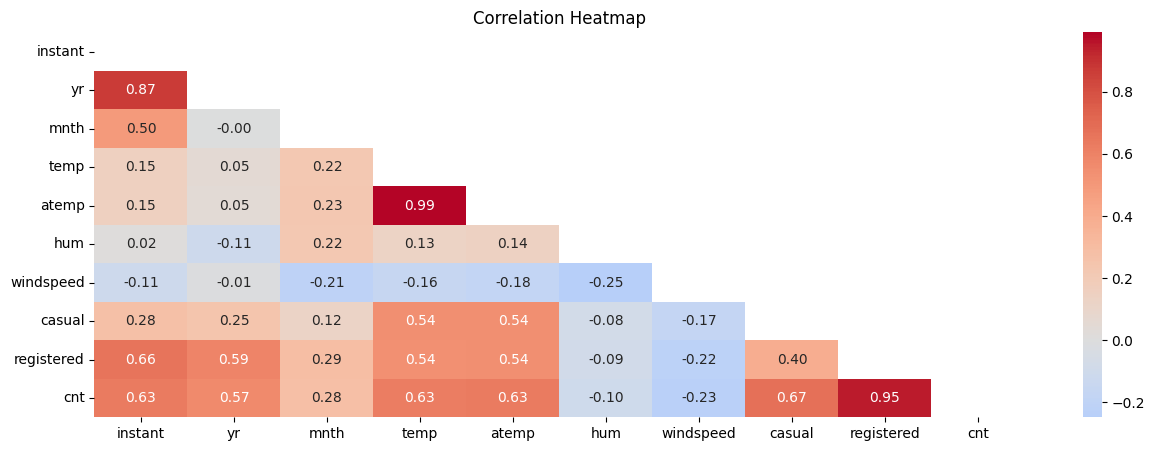

In [880]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = bike_day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Semakin merah semakin kuat korelasinya
- temp sangat berkorelasi dengan atemp (0.99)
- casual dan registered memiliki korelasi yang sama dengan temp dan atemp (0.54)
- pengguna registered memiliki korelasi yang lebih rendah pada hum dan windspeed dibanding pengguna casual

3. Pada jam berapa penggunaan sepeda paling tinggi dan paling rendah?

In [881]:
bike_hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean"],
})

cnt                
    max min        mean
hr                     
0   283   2   53.898072
1   168   1   33.375691
2   132   1   22.869930
3    79   1   11.727403
4    28   1    6.352941
5    66   1   19.889819
6   213   1   76.044138
7   596   1  212.064649
8   839   5  359.011004
9   426  14  219.309491
10  539   8  173.668501
11  663  10  208.143054
12  776   3  253.315934
13  760  11  253.661180
14  750  12  240.949246
15  750   7  251.233196
16  783  11  311.983562
17  976  15  461.452055
18  977  23  425.510989
19  743  11  311.523352
20  567  11  226.030220
21  584   6  172.314560
22  502   9  131.335165
23  256   2   87.831044

**Insight:**
- Penggunaan sepeda tertinggi ada pada jam 17.00
- Penggunaan sepeda terendah ada pada jam 4.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana rata-rata penggunaan sepeda casual dan registered berdasarkan pola perilaku penyewaan pada hari kerja, akhir pekan, dan hari libur?

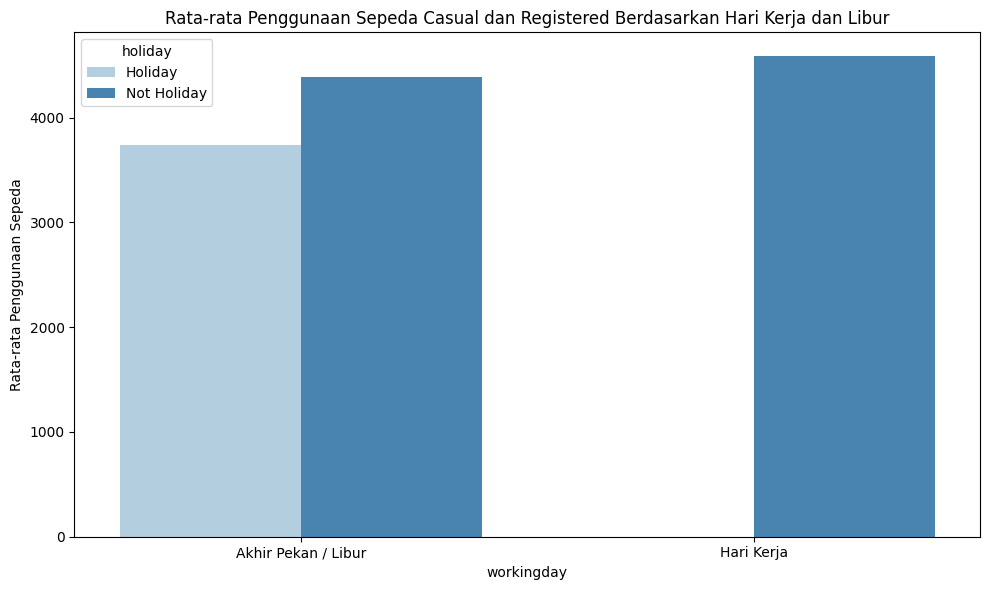

In [882]:
# Plot penggunaan sepeda pada hari kerja,akhir pekan, dan hari libur
day_group = bike_day_df.groupby(["workingday", "holiday"]).agg({
    "cnt": "mean",
}).reset_index()

plt.figure(figsize=(10, 6))

# Visualisasi pengguna casual dan register
sns.barplot(data=day_group, x="workingday", y="cnt", hue="holiday", palette="Blues")



plt.ylabel("Rata-rata Penggunaan Sepeda")
plt.title("Rata-rata Penggunaan Sepeda Casual dan Registered Berdasarkan Hari Kerja dan Libur")
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan / Libur", "Hari Kerja"])
plt.tight_layout()
plt.show()



**Insight:**
Berdasarkan visualisasi data: 
- Penggunaan sepeda pada hari kerja(monday-friday) memiliki jumlah rata-rata pengguna yang lebih banyak dibandingkan pada hari libur
- Penggunaan sepeda pada hari libur biasa memiliki jumlah rata-rata pengguna yang lebih banyak dibandingkan pada hari libur nasional

### Pertanyaan 2: Bagaimana hubungan antara faktor cuaca dan kondisi cuaca dengan jumlah penyewaan oleh pengguna casual dibandingkan dengan pengguna registered?

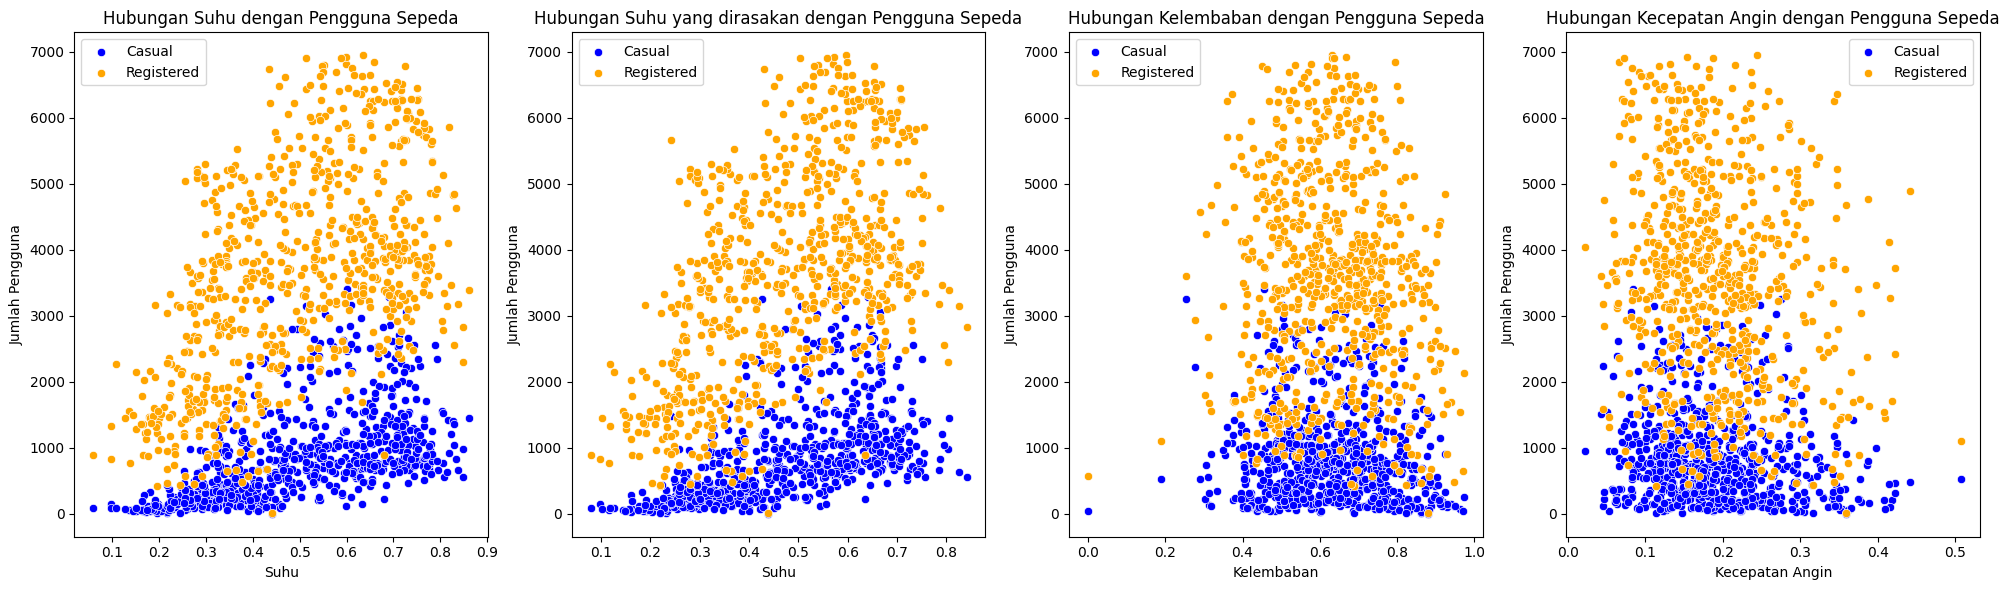

In [883]:
plt.figure(figsize=(20, 6))

# Memvisualisasikan hubungan suhu
plt.subplot(1, 4, 1)
sns.scatterplot(data=bike_day_df, x="temp", y="casual", label="Casual", color="blue")
sns.scatterplot(data=bike_day_df, x="temp", y="registered", label="Registered", color="orange")
plt.title("Hubungan Suhu dengan Pengguna Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Pengguna")

# memvisualisasikan hubungan suhu yang dirasakan
plt.subplot(1, 4, 2)
sns.scatterplot(data=bike_day_df, x="atemp", y="casual", label="Casual", color="blue")
sns.scatterplot(data=bike_day_df, x="atemp", y="registered", label="Registered", color="orange")
plt.title("Hubungan Suhu yang dirasakan dengan Pengguna Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Pengguna")

# memvisualisasikan Hubungan kelembaban
plt.subplot(1, 4, 3)
sns.scatterplot(data=bike_day_df, x="hum", y="casual", label="Casual", color="blue")
sns.scatterplot(data=bike_day_df, x="hum", y="registered", label="Registered", color="orange")
plt.title("Hubungan Kelembaban dengan Pengguna Sepeda")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Pengguna")

# memvisualisasikan Hubungan kecepatan angin
plt.subplot(1, 4, 4)
sns.scatterplot(data=bike_day_df, x="windspeed", y="casual", label="Casual", color="blue")
sns.scatterplot(data=bike_day_df, x="windspeed", y="registered", label="Registered", color="orange")
plt.title("Hubungan Kecepatan Angin dengan Pengguna Sepeda")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Pengguna")

plt.tight_layout()
plt.show()


**Insight:**
Berdasarkan visualisasi data: 
- Jumlah pengguna sepeda cukup meningkat seiring meningkatnya suhu
- Jumlah pengguna sepeda cukup menurun seiring meningkatnya kelembaban di rentang (0.4-1)
- Jumlah pengguna sepeda cukup menurun seiring meningkatnya kecepatan angin

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12812\3313682531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bike_day_df,x="weathersit",y="casual",palette="Blues")


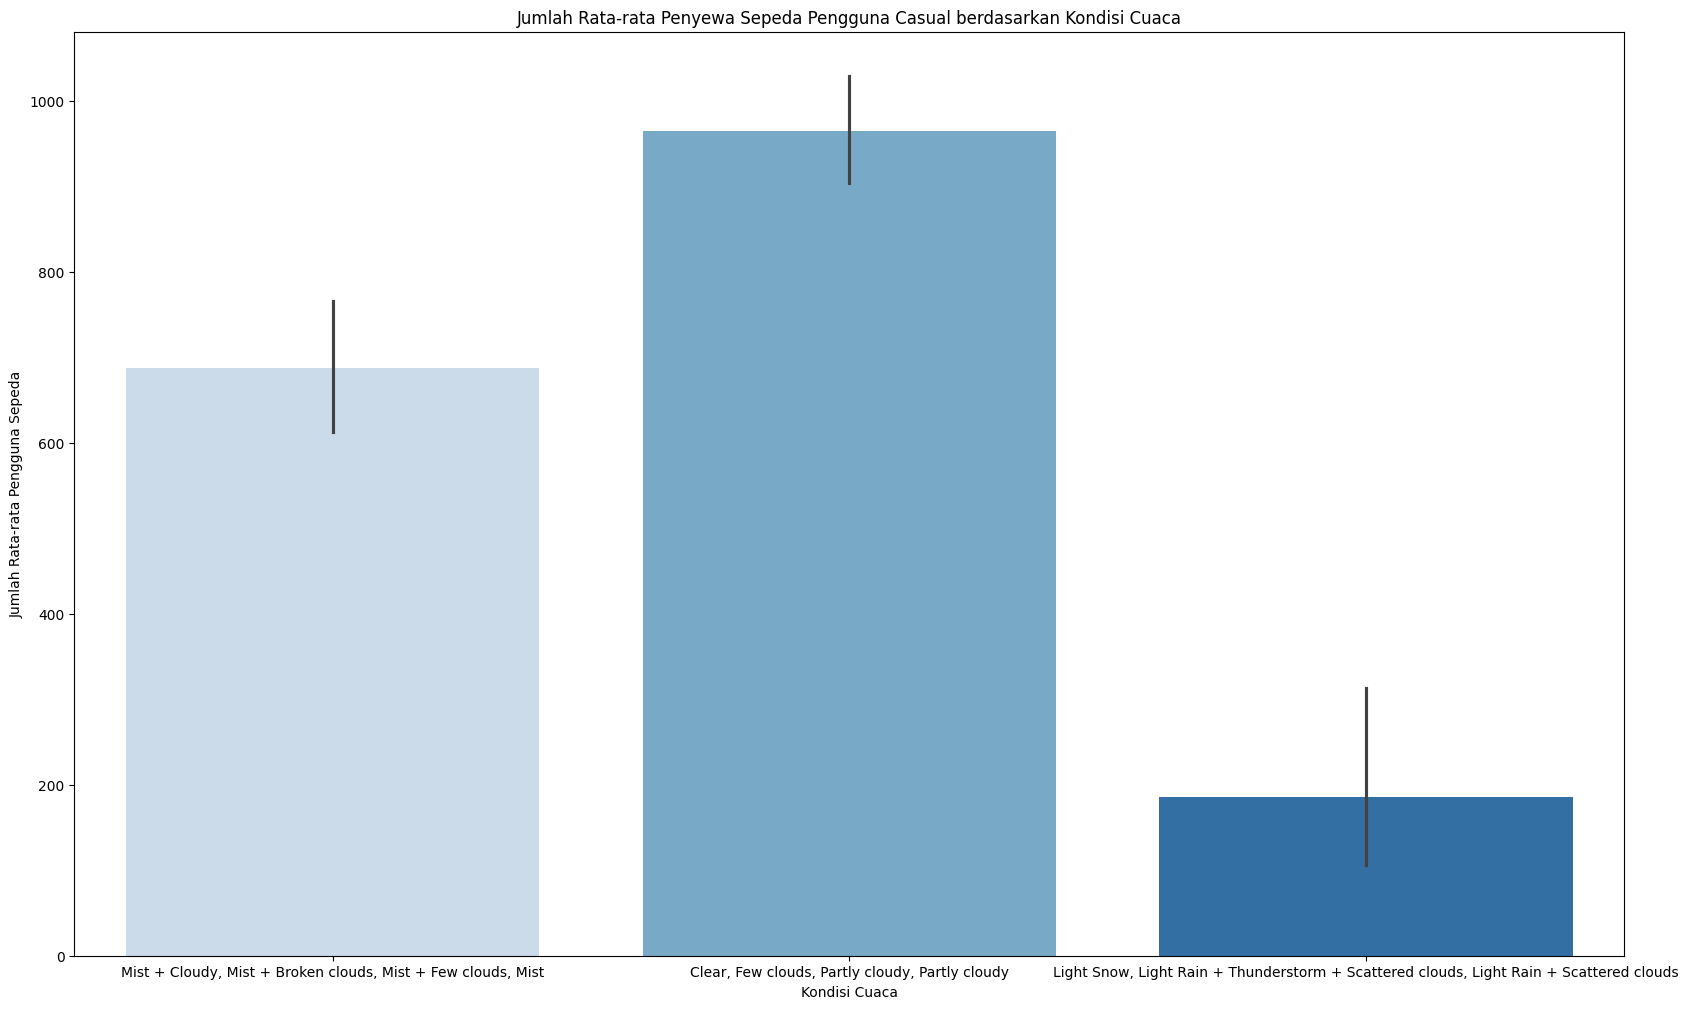

In [884]:
plt.figure(figsize=(20,12))
sns.barplot(data=bike_day_df,x="weathersit",y="casual",palette="Blues")

plt.title("Jumlah Rata-rata Penyewa Sepeda Pengguna Casual berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Rata-rata Pengguna Sepeda")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12812\4108273073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bike_day_df,x="weathersit",y="registered", palette="Oranges")


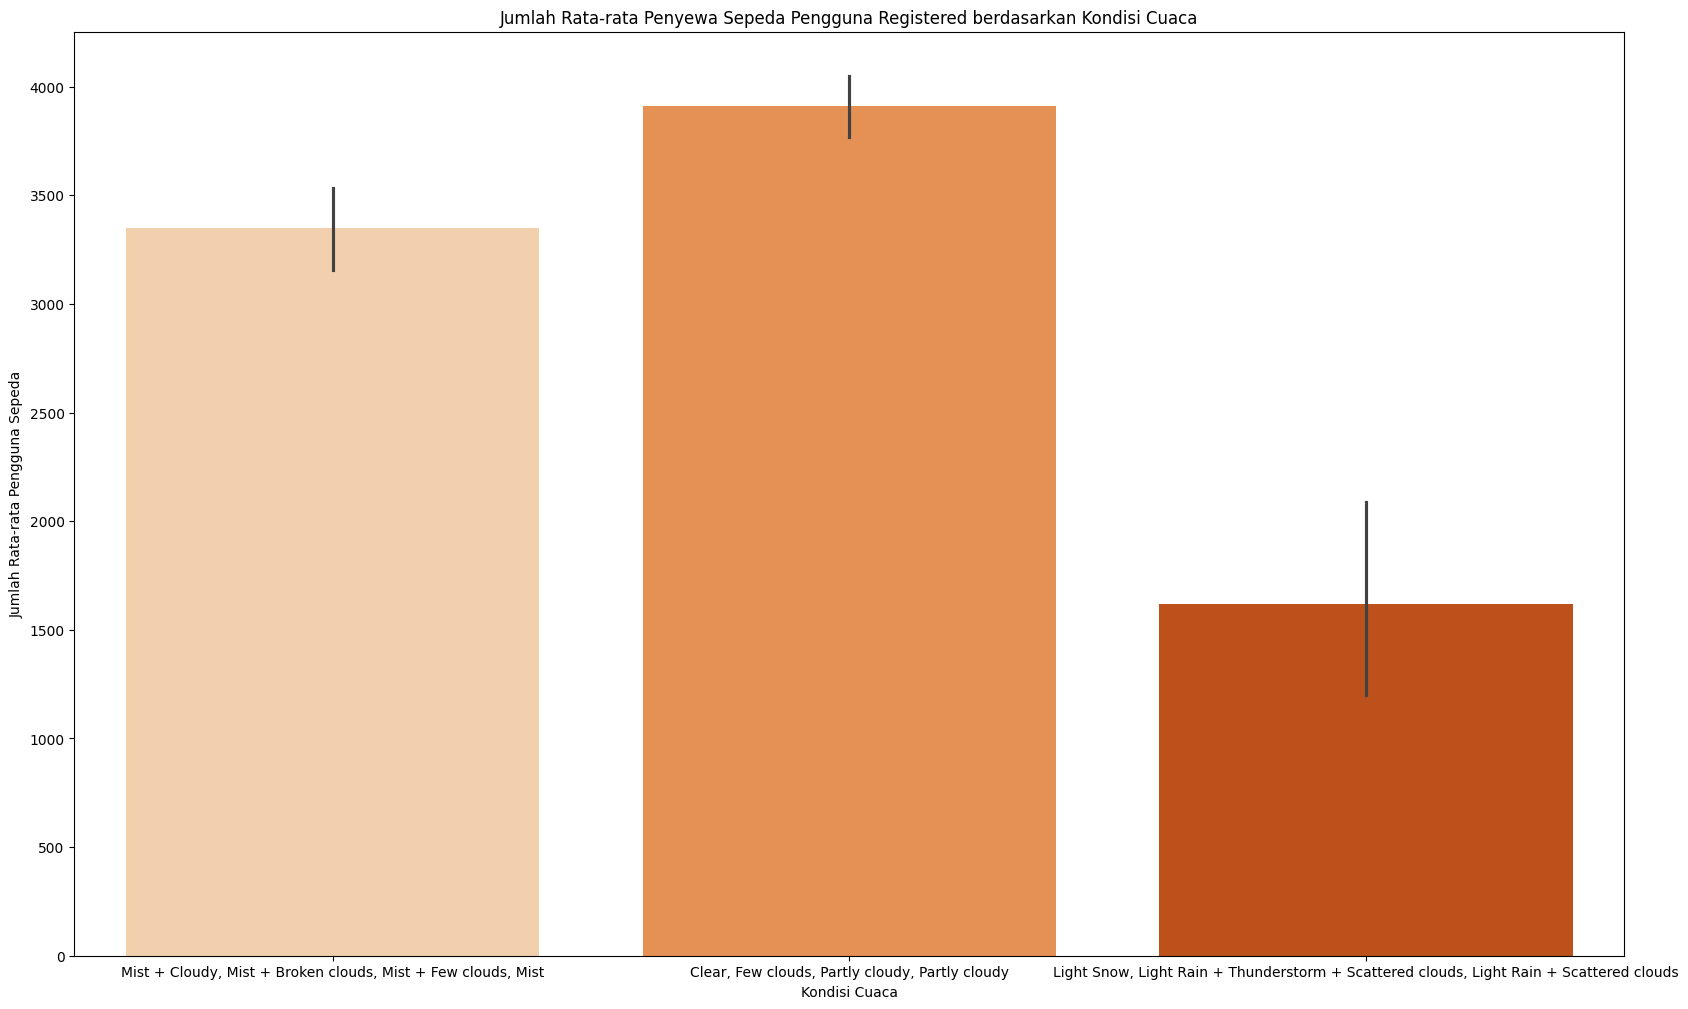

In [885]:
plt.figure(figsize=(20,12))
sns.barplot(data=bike_day_df,x="weathersit",y="registered", palette="Oranges")

plt.title("Jumlah Rata-rata Penyewa Sepeda Pengguna Registered berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Rata-rata Pengguna Sepeda")
plt.show()

**Insight:**
Berdasarkan visualisasi data: 
- Jumlah pengguna casual dan register memiliki pola hubungan kondisi cuaca yang mirip
- Jumlah pengguna sepeda terbanyak ada pada kondisi Clear, Few clouds, Partly cloudy, Partly cloudy
- Jumlah pengguna sepeda terendah ada pada kondisi Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### Pertanyaan 3: Pada jam berapa rata-rata penggunaan sepeda paling tinggi dan paling rendah?

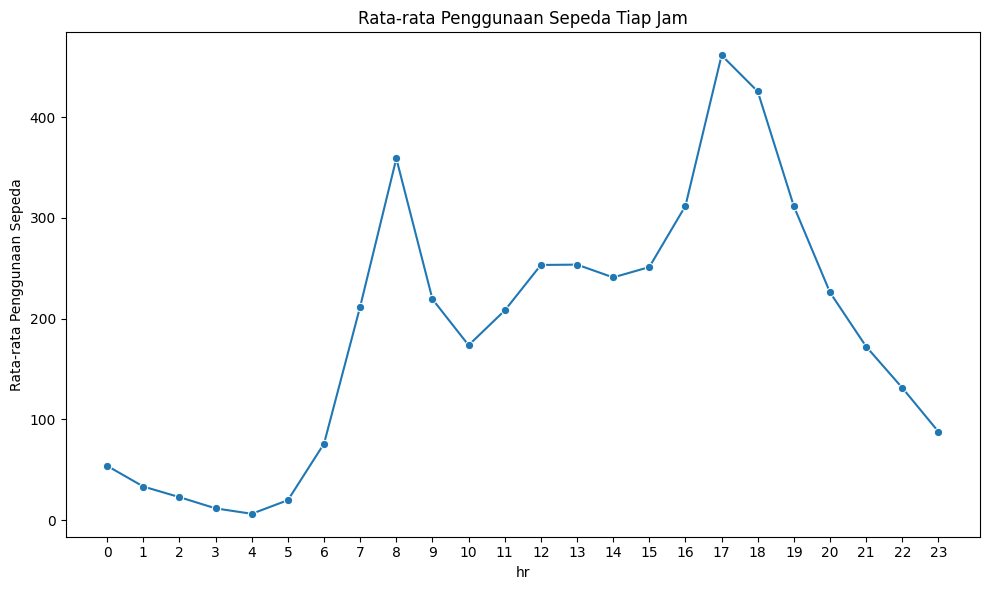

In [886]:
hourly_counts = bike_hour_df.groupby(by="hr").agg({
    "cnt": "mean"
}).reset_index()  


plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x="hr", y="cnt", marker="o")

plt.ylabel("Rata-rata Penggunaan Sepeda")
plt.title("Rata-rata Penggunaan Sepeda Tiap Jam")
plt.xticks(ticks=hourly_counts["hr"], labels=hourly_counts["hr"])
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata penggunaan sepeda tertinggi ada pada jam 17.00
- Rata-rata penggunaan sepeda terendah ada pada jam 04.00

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan hasil visualisasi data, Jumlah penggunaan sepeda tertinggi ada pada hari working day yang memiliki rata-rata pengguna sebesar 4584.82. Lalu diikuti oleh hari libur akhir pekan dan yang terendah pada hari libur nasional yang hanya memiliki rata-rata pengguna sebesar 3735.00.
- Conclution pertanyaan 2 : Berdasarkan hasil visualisasi hubungan faktor cuaca dan kondisi cuaca dengan pengguna sepeda casual dan register, dapat disimpulkan bahwa pola hubungan yang dimiliki dari kedua kelompok pengguna memiliki pola yang hampir sama. Jumlah pengguna sepeda akan cukup meningkat apabila suhu meningkat. Jumlah pengguna sepeda akan sedikit mengalami penurunan apabila kelembaban dan windspeed meningkat. Dapat disimpulkan juga jumlah pengguna sepeda terbanyak ada pada kondisi Clear, Few clouds, Partly cloudy, Partly cloudy dan jumlah pengguna terendah pada Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
- Conclution pertanyaan 3 : Berdasarkan hasil visualisasi data, grafik menunjukkan rata-rata penggunaan sepeda tertinggi ada pada jam 17.00 yang memiliki rata-rata pengguna sebesar 461.45 dan rata-rata penggunaan sepeda terendah ada pada jam 4.00 yang memiliki pengguna rata-rata sebesar 6.35.

Export dataframe ke csv

In [887]:
bike_day_df.to_csv("dashboard/main_data.csv", index=False)